Temperature Annual Signal

conduct linear fit to a sinsddial function 

Tfit.lm <- lm(temp ~ sin(rday) + cos(rday), data = df)

In [1]:
from dataretrieval import nwis
from IPython.display import display
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
siteNumber = "12305000"  
parameterCode = "00060" # Discharge
startDate = "2000-10-01"
endDate = "2024-09-30"



In [3]:

# Retrieve site information
site_info = nwis.get_info(sites= siteNumber )

site_info_df = pd.DataFrame( site_info[0] )

print( site_info_df )

print( site_info_df.columns )


  agency_cd   site_no                    station_nm site_tp_cd     lat_va  \
0      USGS  12305000  KOOTENAI RIVER AT LEONIA, ID         ST  483700.78   

     long_va  dec_lat_va  dec_long_va coord_meth_cd  coord_acy_cd  ...  \
0  1160257.1   48.616883  -116.049194             N             1  ...   

  local_time_fg reliability_cd  gw_file_cd  nat_aqfr_cd  aqfr_cd aqfr_type_cd  \
0             Y              C    NNNNNNNN          NaN      NaN          NaN   

  well_depth_va hole_depth_va  depth_src_cd  project_no  
0           NaN           NaN           NaN         NaN  

[1 rows x 42 columns]
Index(['agency_cd', 'site_no', 'station_nm', 'site_tp_cd', 'lat_va', 'long_va',
       'dec_lat_va', 'dec_long_va', 'coord_meth_cd', 'coord_acy_cd',
       'coord_datum_cd', 'dec_coord_datum_cd', 'district_cd', 'state_cd',
       'county_cd', 'country_cd', 'land_net_ds', 'map_nm', 'map_scale_fc',
       'alt_va', 'alt_meth_cd', 'alt_acy_va', 'alt_datum_cd', 'huc_cd',
       'basin_cd', 'topo

In [4]:
parameterCode = "00010" 

# Retrieve the data
dailyStreamtemp = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 

dailyStreamtemp_df = pd.DataFrame( dailyStreamtemp[0] )
dailyStreamtemp_df = dailyStreamtemp_df.reset_index()
dailyStreamtemp_df['Date'] = dailyStreamtemp_df['datetime'].dt.date
dailyStreamtemp_df['Month'] = dailyStreamtemp_df['datetime'].dt.month
dailyStreamtemp_df['Year'] = dailyStreamtemp_df['datetime'].dt.year

print( dailyStreamtemp_df)

print( dailyStreamtemp_df.dtypes)
print( type(dailyStreamtemp_df[["Date"]]) )

                      datetime   site_no  00010_Maximum 00010_Maximum_cd  \
0    2011-09-30 00:00:00+00:00  12305000           14.4                A   
1    2011-10-01 00:00:00+00:00  12305000           15.5                A   
2    2011-10-02 00:00:00+00:00  12305000           15.5                A   
3    2011-10-03 00:00:00+00:00  12305000           15.5                A   
4    2011-10-04 00:00:00+00:00  12305000           14.5                A   
...                        ...       ...            ...              ...   
4411 2024-09-26 00:00:00+00:00  12305000           15.7                P   
4412 2024-09-27 00:00:00+00:00  12305000           14.3                P   
4413 2024-09-28 00:00:00+00:00  12305000           14.1                P   
4414 2024-09-29 00:00:00+00:00  12305000           14.2                P   
4415 2024-09-30 00:00:00+00:00  12305000           13.6                P   

      00010_Minimum 00010_Minimum_cd  00010_Mean 00010_Mean_cd        Date  \
0        

the minimum date of stream temp


In [5]:
#print( (dailyStreamtemp_df[["Date"]].iloc[0] )   )
min_dailyStreamtemp_date = str( dailyStreamtemp_df["Date"].iloc[0] )
print(  
   min_dailyStreamtemp_date 
    
#    min_dailyStreamtemp_date  
)
print( type(  min_dailyStreamtemp_date )    )

2011-09-30
<class 'str'>


In [6]:
parameterCode = "00060" 
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start= min_dailyStreamtemp_date , end=endDate) 
print(dailyStreamflow)
print( type(dailyStreamflow) )

(                            site_no  00060_Mean 00060_Mean_cd
datetime                                                     
2011-09-30 00:00:00+00:00  12305000      6850.0             A
2011-10-01 00:00:00+00:00  12305000      6850.0             A
2011-10-02 00:00:00+00:00  12305000      6140.0             A
2011-10-03 00:00:00+00:00  12305000      5180.0             A
2011-10-04 00:00:00+00:00  12305000      4910.0             A
...                             ...         ...           ...
2024-09-26 00:00:00+00:00  12305000      8500.0             A
2024-09-27 00:00:00+00:00  12305000      8510.0             A
2024-09-28 00:00:00+00:00  12305000      8500.0             A
2024-09-29 00:00:00+00:00  12305000      8490.0             A
2024-09-30 00:00:00+00:00  12305000      8500.0             A

[4750 rows x 3 columns], NWIS_Metadata(url=https://waterservices.usgs.gov/nwis/dv?format=json&parameterCd=00060&startDT=2011-09-30&endDT=2024-09-30&sites=12305000))
<class 'tuple'>


In [7]:
dailyStreamflow_df = pd.DataFrame( dailyStreamflow[0] )
dailyStreamflow_df =dailyStreamflow_df .reset_index()


# Convert datetime to date (remove the time part)
dailyStreamflow_df['Date'] = dailyStreamflow_df['datetime'].dt.date
dailyStreamflow_df['Month'] = dailyStreamflow_df['datetime'].dt.month
dailyStreamflow_df['Year'] = dailyStreamflow_df['datetime'].dt.year

dailyStreamflow_df = dailyStreamflow_df[ dailyStreamflow_df['Month'].isin( [6,7,8] )    ]

print(dailyStreamflow_df)

                      datetime   site_no  00060_Mean 00060_Mean_cd  \
245  2012-06-01 00:00:00+00:00  12305000     31500.0             A   
246  2012-06-02 00:00:00+00:00  12305000     37500.0             A   
247  2012-06-03 00:00:00+00:00  12305000     40100.0             A   
248  2012-06-04 00:00:00+00:00  12305000     39900.0             A   
249  2012-06-05 00:00:00+00:00  12305000     42200.0             A   
...                        ...       ...         ...           ...   
4715 2024-08-27 00:00:00+00:00  12305000      8580.0             A   
4716 2024-08-28 00:00:00+00:00  12305000      8610.0             A   
4717 2024-08-29 00:00:00+00:00  12305000      8620.0             A   
4718 2024-08-30 00:00:00+00:00  12305000      8590.0             A   
4719 2024-08-31 00:00:00+00:00  12305000      8560.0             A   

            Date  Month  Year  
245   2012-06-01      6  2012  
246   2012-06-02      6  2012  
247   2012-06-03      6  2012  
248   2012-06-04      6  2012  

In [8]:
print( "siteNumber:", siteNumber    )

print("min_dailyStreamtemp_date:", min_dailyStreamtemp_date)

print("dec_lat_va:", site_info_df["dec_lat_va"]    )

print("dec_long_va:", site_info_df["dec_long_va"]    )


siteNumber: 12305000
min_dailyStreamtemp_date: 2011-09-30
dec_lat_va: 0    48.616883
Name: dec_lat_va, dtype: float64
dec_long_va: 0   -116.049194
Name: dec_long_va, dtype: float64


In [9]:
import pandas as pd

# Shared Google Drive URL
shared_url = "https://drive.google.com/file/d/1jhmPHZ2ivlXNZ25LpWTJIkA9FmK1xoBZ/view?usp=share_link"

# Extract the file ID
file_id = shared_url.split('/d/')[1].split('/')[0]

# Create the direct download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a pandas DataFrame
prism_df = pd.read_csv(download_url)

print( prism_df)

      system:index        date      tmean  \
0         20120115  2012-01-14  -0.644000   
1         20120116  2012-01-15  -4.775000   
2         20120117  2012-01-16  -6.063000   
3         20120118  2012-01-17  -5.317000   
4         20120119  2012-01-18  -9.106001   
...            ...         ...        ...   
4653      20241011  2024-10-10  10.007200   
4654      20241012  2024-10-11   8.662700   
4655      20241013  2024-10-12   9.974999   
4656      20241014  2024-10-13  11.141400   
4657      20241015  2024-10-14  13.207850   

                                        .geo  
0     {"type":"MultiPoint","coordinates":[]}  
1     {"type":"MultiPoint","coordinates":[]}  
2     {"type":"MultiPoint","coordinates":[]}  
3     {"type":"MultiPoint","coordinates":[]}  
4     {"type":"MultiPoint","coordinates":[]}  
...                                      ...  
4653  {"type":"MultiPoint","coordinates":[]}  
4654  {"type":"MultiPoint","coordinates":[]}  
4655  {"type":"MultiPoint","coordina

In [10]:
prism_df['date'] = pd.to_datetime( prism_df['date'])

print( prism_df.dtypes   )

system:index             int64
date            datetime64[ns]
tmean                  float64
.geo                    object
dtype: object


In [11]:
# Function to calculate days since October 1st for each row
#def days_since_october_first(date):
#    october_first = pd.Timestamp(year=date.year, month=10, day=1)
#    return (date - october_first).days

# Function to calculate days since October 1st
def days_since_october_first(date):
    october_first = pd.Timestamp(year=date.year, month=10, day=1)
    days_difference = (date - october_first).days
    # Adjust for negative values (wrap-around)
    return days_difference if days_difference >= 0 else days_difference + 365

# Apply the function to calculate days since October 1st
prism_df['Days_Since_October_1st'] =  prism_df['date'].apply(days_since_october_first)

prism_df

,system:index,date,tmean,.geo,Days_Since_October_1st
0,20120115,2012-01-14,-0.644000,"{""type"":""MultiPoint"",""coordinates"":[]}",104
1,20120116,2012-01-15,-4.775000,"{""type"":""MultiPoint"",""coordinates"":[]}",105
2,20120117,2012-01-16,-6.063000,"{""type"":""MultiPoint"",""coordinates"":[]}",106
3,20120118,2012-01-17,-5.317000,"{""type"":""MultiPoint"",""coordinates"":[]}",107
4,20120119,2012-01-18,-9.106001,"{""type"":""MultiPoint"",""coordinates"":[]}",108
...,...,...,...,...,...
4653,20241011,2024-10-10,10.007200,"{""type"":""MultiPoint"",""coordinates"":[]}",9
4654,20241012,2024-10-11,8.662700,"{""type"":""MultiPoint"",""coordinates"":[]}",10
4655,20241013,2024-10-12,9.974999,"{""type"":""MultiPoint"",""coordinates"":[]}",11
4656,20241014,2024-10-13,11.141400,"{""type"":""MultiPoint"",""coordinates"":[]}",12


In [12]:
prism_df[ "rad_d"   ] = 2 * np.pi * prism_df[ "Days_Since_October_1st"   ] /365

prism_df


,system:index,date,tmean,.geo,Days_Since_October_1st,rad_d
0,20120115,2012-01-14,-0.644000,"{""type"":""MultiPoint"",""coordinates"":[]}",104,1.790277
1,20120116,2012-01-15,-4.775000,"{""type"":""MultiPoint"",""coordinates"":[]}",105,1.807492
2,20120117,2012-01-16,-6.063000,"{""type"":""MultiPoint"",""coordinates"":[]}",106,1.824706
3,20120118,2012-01-17,-5.317000,"{""type"":""MultiPoint"",""coordinates"":[]}",107,1.841920
4,20120119,2012-01-18,-9.106001,"{""type"":""MultiPoint"",""coordinates"":[]}",108,1.859134
...,...,...,...,...,...,...
4653,20241011,2024-10-10,10.007200,"{""type"":""MultiPoint"",""coordinates"":[]}",9,0.154928
4654,20241012,2024-10-11,8.662700,"{""type"":""MultiPoint"",""coordinates"":[]}",10,0.172142
4655,20241013,2024-10-12,9.974999,"{""type"":""MultiPoint"",""coordinates"":[]}",11,0.189356
4656,20241014,2024-10-13,11.141400,"{""type"":""MultiPoint"",""coordinates"":[]}",12,0.206570


In [13]:
# Create sine and cosine transformations of rday
prism_df['sin_rday'] = np.sin( prism_df['rad_d'] )
prism_df['cos_rday'] = np.cos( prism_df['rad_d'] )

# Fit the linear regression model
model = smf.ols('tmean ~ sin_rday + cos_rday', data= prism_df ).fit()

# Print the summary of the model
print(model.summary())

#Tfit.lm <- lm(temp ~ sin(rday) + cos(rday), data = df)

                            OLS Regression Results                            
Dep. Variable:                  tmean   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 1.046e+04
Date:                Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:03:56   Log-Likelihood:                -12920.
No. Observations:                4658   AIC:                         2.585e+04
Df Residuals:                    4655   BIC:                         2.587e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1521      0.057    143.459      0.0

In [14]:
prism_df['fit'] = model.predict( prism_df )
prism_df

,system:index,date,tmean,.geo,Days_Since_October_1st,rad_d,sin_rday,cos_rday,fit
0,20120115,2012-01-14,-0.644000,"{""type"":""MultiPoint"",""coordinates"":[]}",104,1.790277,0.976011,-0.217723,-3.444915
1,20120116,2012-01-15,-4.775000,"{""type"":""MultiPoint"",""coordinates"":[]}",105,1.807492,0.972118,-0.234491,-3.453897
2,20120117,2012-01-16,-6.063000,"{""type"":""MultiPoint"",""coordinates"":[]}",106,1.824706,0.967938,-0.251190,-3.459441
3,20120118,2012-01-17,-5.317000,"{""type"":""MultiPoint"",""coordinates"":[]}",107,1.841920,0.963471,-0.267814,-3.461543
4,20120119,2012-01-18,-9.106001,"{""type"":""MultiPoint"",""coordinates"":[]}",108,1.859134,0.958718,-0.284359,-3.460204
...,...,...,...,...,...,...,...,...,...
4653,20241011,2024-10-10,10.007200,"{""type"":""MultiPoint"",""coordinates"":[]}",9,0.154928,0.154309,0.988023,9.520501
4654,20241012,2024-10-11,8.662700,"{""type"":""MultiPoint"",""coordinates"":[]}",10,0.172142,0.171293,0.985220,9.321782
4655,20241013,2024-10-12,9.974999,"{""type"":""MultiPoint"",""coordinates"":[]}",11,0.189356,0.188227,0.982126,9.122715
4656,20241014,2024-10-13,11.141400,"{""type"":""MultiPoint"",""coordinates"":[]}",12,0.206570,0.205104,0.978740,8.923362


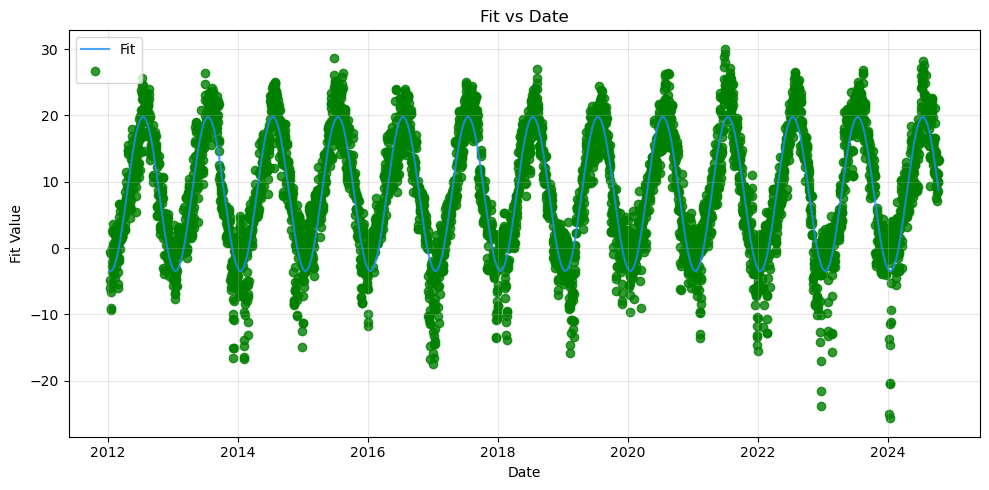

In [15]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
plt.plot( prism_df['date'],  prism_df['fit'], label='Fit', color='dodgerblue', alpha=0.8)
plt.scatter( prism_df['date'],  prism_df['tmean'], label=' ', color='green', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Fit Value')
plt.title('Fit vs Date')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
dailyStreamtemp_df['Date'] = pd.to_datetime( dailyStreamtemp_df['Date'])

merged_df = pd.merge( prism_df,  dailyStreamtemp_df,     left_on='date', right_on='Date',  how='outer')
merged_df = merged_df[ merged_df['Month'].isin( [6,7,8] )    ]
print(merged_df)

      system:index       date      tmean  \
245     20120602.0 2012-06-01  15.100000   
246     20120603.0 2012-06-02  13.240001   
247     20120604.0 2012-06-03  14.009001   
248     20120605.0 2012-06-04  16.588001   
249     20120606.0 2012-06-05  10.858001   
...            ...        ...        ...   
4715    20240828.0 2024-08-27  13.803900   
4716    20240829.0 2024-08-28   9.407150   
4717    20240830.0 2024-08-29  15.314099   
4718    20240831.0 2024-08-30  18.671799   
4719    20240901.0 2024-08-31  20.651649   

                                        .geo  Days_Since_October_1st  \
245   {"type":"MultiPoint","coordinates":[]}                   243.0   
246   {"type":"MultiPoint","coordinates":[]}                   244.0   
247   {"type":"MultiPoint","coordinates":[]}                   245.0   
248   {"type":"MultiPoint","coordinates":[]}                   246.0   
249   {"type":"MultiPoint","coordinates":[]}                   247.0   
...                                    

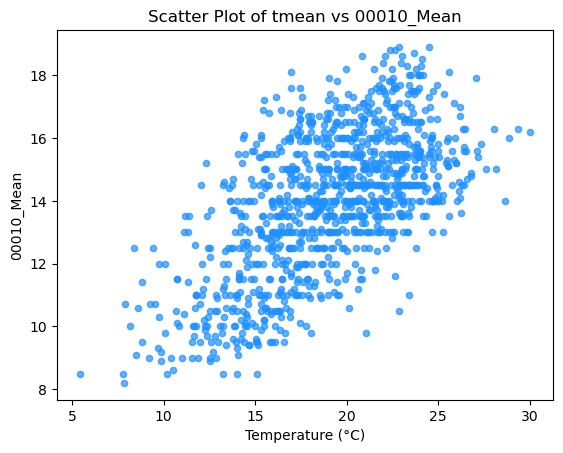

In [17]:
merged_df.plot(kind='scatter', x='tmean', y='00010_Mean'
               , color='dodgerblue'
               , alpha=0.7 
            #   ,c='Year'   
              )




# Set plot title and labels
plt.title('Scatter Plot of tmean vs 00010_Mean')
plt.xlabel('Temperature (°C)')
plt.ylabel('00010_Mean')

# Show the plot
plt.show()

<Axes: xlabel='tmean', ylabel='00010_Mean'>

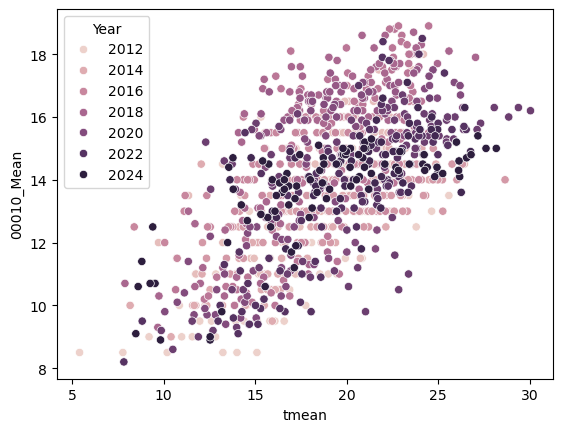

In [18]:
import seaborn as sns
sns.scatterplot(data= merged_df,  x='tmean', y='00010_Mean', hue='Year')

In [19]:
merged_df["w_a"] = merged_df["00010_Mean"]/merged_df["tmean"]
merged_df["w_a"] 

245     0.562914
246     0.641994
247     0.606753
248     0.572703
249     0.920980
          ...   
4715    0.992473
4716    1.328776
4717    0.842361
4718    0.744438
4719    0.716650
Name: w_a, Length: 1091, dtype: float64

<Figure size 800x600 with 0 Axes>

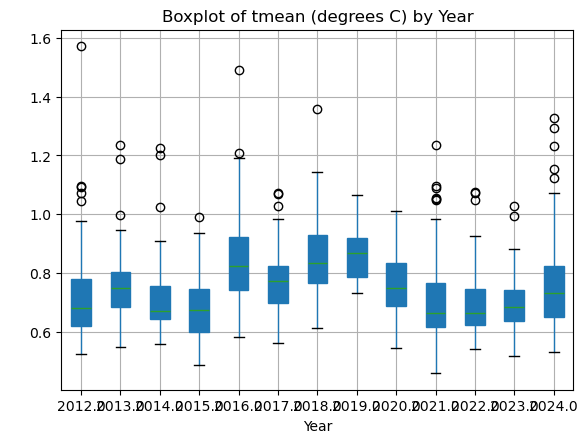

In [20]:
plt.figure(figsize=(8, 6))
merged_df.boxplot(column="w_a", by='Year', patch_artist=True)

# Set plot title and labels
plt.title('Boxplot of tmean (degrees C) by Year')
plt.suptitle('')  # To remove the default "Boxplot" title
plt.xlabel('Year')
plt.ylabel(' ')

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

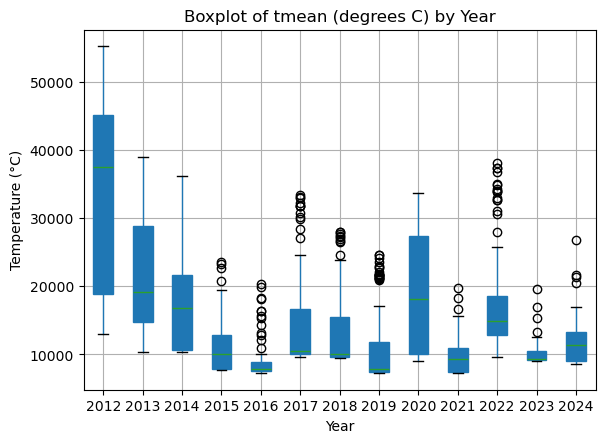

In [21]:
plt.figure(figsize=(8, 6))
dailyStreamflow_df.boxplot(column="00060_Mean", by='Year', patch_artist=True)

# Set plot title and labels
plt.title('Boxplot of  by Year')
plt.suptitle('')  # To remove the default "Boxplot" title
plt.xlabel('Year')
plt.ylabel(' ')

# Show the plot
plt.show()

In [22]:
dailyStreamflow_df 

,datetime,site_no,00060_Mean,00060_Mean_cd,Date,Month,Year
245,2012-06-01 00:00:00+00:00,12305000,31500.0,A,2012-06-01,6,2012
246,2012-06-02 00:00:00+00:00,12305000,37500.0,A,2012-06-02,6,2012
247,2012-06-03 00:00:00+00:00,12305000,40100.0,A,2012-06-03,6,2012
248,2012-06-04 00:00:00+00:00,12305000,39900.0,A,2012-06-04,6,2012
249,2012-06-05 00:00:00+00:00,12305000,42200.0,A,2012-06-05,6,2012
...,...,...,...,...,...,...,...
4715,2024-08-27 00:00:00+00:00,12305000,8580.0,A,2024-08-27,8,2024
4716,2024-08-28 00:00:00+00:00,12305000,8610.0,A,2024-08-28,8,2024
4717,2024-08-29 00:00:00+00:00,12305000,8620.0,A,2024-08-29,8,2024
4718,2024-08-30 00:00:00+00:00,12305000,8590.0,A,2024-08-30,8,2024


In [23]:
median_buffer = merged_df.groupby('Year')["w_a"].median()
print(merged_df)
print(median_buffer)

      system:index       date      tmean  \
245     20120602.0 2012-06-01  15.100000   
246     20120603.0 2012-06-02  13.240001   
247     20120604.0 2012-06-03  14.009001   
248     20120605.0 2012-06-04  16.588001   
249     20120606.0 2012-06-05  10.858001   
...            ...        ...        ...   
4715    20240828.0 2024-08-27  13.803900   
4716    20240829.0 2024-08-28   9.407150   
4717    20240830.0 2024-08-29  15.314099   
4718    20240831.0 2024-08-30  18.671799   
4719    20240901.0 2024-08-31  20.651649   

                                        .geo  Days_Since_October_1st  \
245   {"type":"MultiPoint","coordinates":[]}                   243.0   
246   {"type":"MultiPoint","coordinates":[]}                   244.0   
247   {"type":"MultiPoint","coordinates":[]}                   245.0   
248   {"type":"MultiPoint","coordinates":[]}                   246.0   
249   {"type":"MultiPoint","coordinates":[]}                   247.0   
...                                    

In [24]:
median_Q = dailyStreamflow_df.groupby('Year')["00060_Mean"].median()


print(median_Q)

print( type( median_Q) )
                         

Year
2012    37450.0
2013    19150.0
2014    16750.0
2015     9985.0
2016     7890.0
2017    10450.0
2018    10100.0
2019     7790.0
2020    18150.0
2021     9330.0
2022    14850.0
2023     9285.0
2024    11450.0
Name: 00060_Mean, dtype: float64
<class 'pandas.core.series.Series'>


In [25]:
Q_buffer = pd.merge( median_buffer,  median_Q, on='Year')

print( Q_buffer)

             w_a  00060_Mean
Year                        
2012.0  0.681243     37450.0
2013.0  0.750402     19150.0
2014.0  0.672579     16750.0
2015.0  0.675250      9985.0
2016.0  0.824091      7890.0
2017.0  0.771964     10450.0
2018.0  0.834855     10100.0
2019.0  0.867396      7790.0
2020.0  0.751100     18150.0
2021.0  0.664454      9330.0
2022.0  0.664949     14850.0
2023.0  0.684794      9285.0
2024.0  0.731873     11450.0


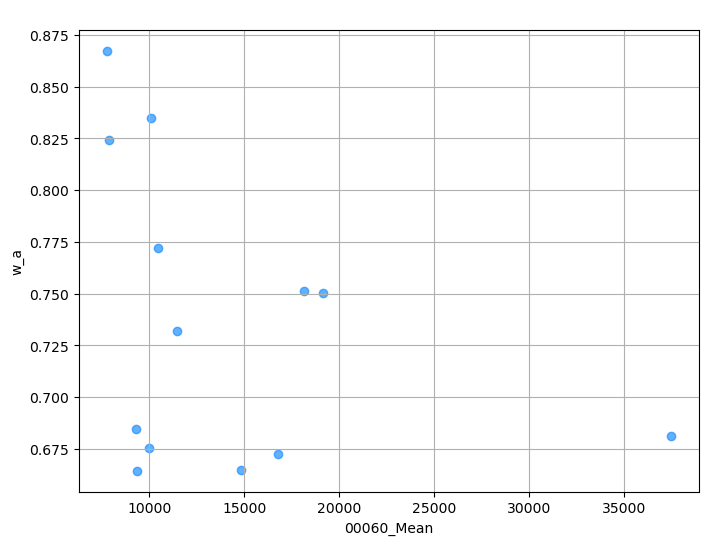

In [26]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(    Q_buffer['00060_Mean'], Q_buffer['w_a'], color='dodgerblue', alpha=0.7)
plt.title(' ')
plt.xlabel('00060_Mean')
plt.ylabel('w_a')
plt.grid(True)